In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install keras
!pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [2]:
df = pd.read_csv('SNAP.csv')

In [3]:
df.shape

(1190, 7)

In [4]:
df1 = df
df = df['Open'].values
df = df.reshape(-1, 1)
df1 = df1['Close'].values
df1 = df1.reshape(-1,1)

In [5]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])
dataset_train1 = np.array(df1[:int(df1.shape[0]*0.8)])
dataset_test1 = np.array(df1[int(df1.shape[0]*0.8):])

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)
dataset_train = scaler.fit_transform(dataset_train1)
dataset_test = scaler.transform(dataset_test1)

In [7]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [8]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)
x_train1, y_train1 = create_dataset(dataset_train1)
x_test1, y_test1 = create_dataset(dataset_test1)

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1], 1))
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))

In [10]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model1 = Sequential()
model1.add(LSTM(units=96, return_sequences=True, input_shape=(x_train1.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(LSTM(units=96,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=96,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=96))
model1.add(Dropout(0.2))
model1.add(Dense(units=1))

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1], 1))
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam')
model1.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
model.fit(x_train, y_train, epochs=100, batch_size=64)
model.save('stock_prediction.h5')

Epoch 1/100
15/15 [==============================] - 8s 132ms/step - loss: 0.0221
Epoch 2/100
15/15 [==============================] - 2s 136ms/step - loss: 0.0071
Epoch 3/100
15/15 [==============================] - 2s 130ms/step - loss: 0.0032
Epoch 4/100
15/15 [==============================] - 2s 130ms/step - loss: 0.0030
Epoch 5/100
15/15 [==============================] - 2s 131ms/step - loss: 0.0031
Epoch 6/100
15/15 [==============================] - 2s 135ms/step - loss: 0.0029
Epoch 7/100
15/15 [==============================] - 2s 132ms/step - loss: 0.0030
Epoch 8/100
15/15 [==============================] - 2s 129ms/step - loss: 0.0026
Epoch 9/100
15/15 [==============================] - 2s 123ms/step - loss: 0.0025
Epoch 10/100
15/15 [==============================] - 2s 138ms/step - loss: 0.0026
Epoch 11/100
15/15 [==============================] - 2s 128ms/step - loss: 0.0024
Epoch 12/100
15/15 [==============================] - 2s 123ms/step - loss: 0.0023
Epoch 13/100


In [14]:
model1.fit(x_train1, y_train1, epochs=100, batch_size=64)
model1.save('stock_prediction1.h5')

Epoch 1/100
15/15 [==============================] - 6s 120ms/step - loss: 187.7377
Epoch 2/100
15/15 [==============================] - 2s 116ms/step - loss: 80.1146
Epoch 3/100
15/15 [==============================] - 2s 132ms/step - loss: 60.1715
Epoch 4/100
15/15 [==============================] - 2s 130ms/step - loss: 55.0598
Epoch 5/100
15/15 [==============================] - 2s 116ms/step - loss: 52.1977
Epoch 6/100
15/15 [==============================] - 2s 121ms/step - loss: 52.2990
Epoch 7/100
15/15 [==============================] - 2s 136ms/step - loss: 52.2800
Epoch 8/100
15/15 [==============================] - 2s 117ms/step - loss: 52.3707
Epoch 9/100
15/15 [==============================] - 2s 120ms/step - loss: 52.5591
Epoch 10/100
15/15 [==============================] - 2s 113ms/step - loss: 52.5350
Epoch 11/100
15/15 [==============================] - 2s 120ms/step - loss: 52.0384
Epoch 12/100
15/15 [==============================] - 2s 115ms/step - loss: 52.9224


In [15]:
model = load_model('stock_prediction.h5')
model1 = load_model('stock_prediction1.h5')

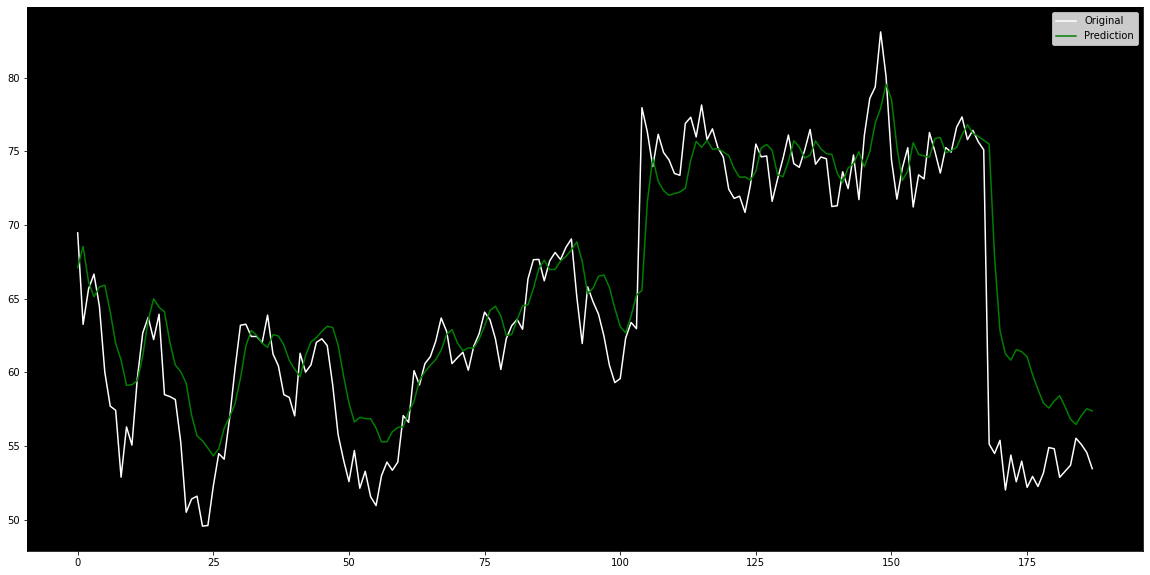

In [19]:
#Open Prediction
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(20,10))
ax.set_facecolor('#000000')
ax.plot(y_test_scaled, color='white', label='Original')
plt.plot(predictions, color='green', label='Prediction')
plt.legend()


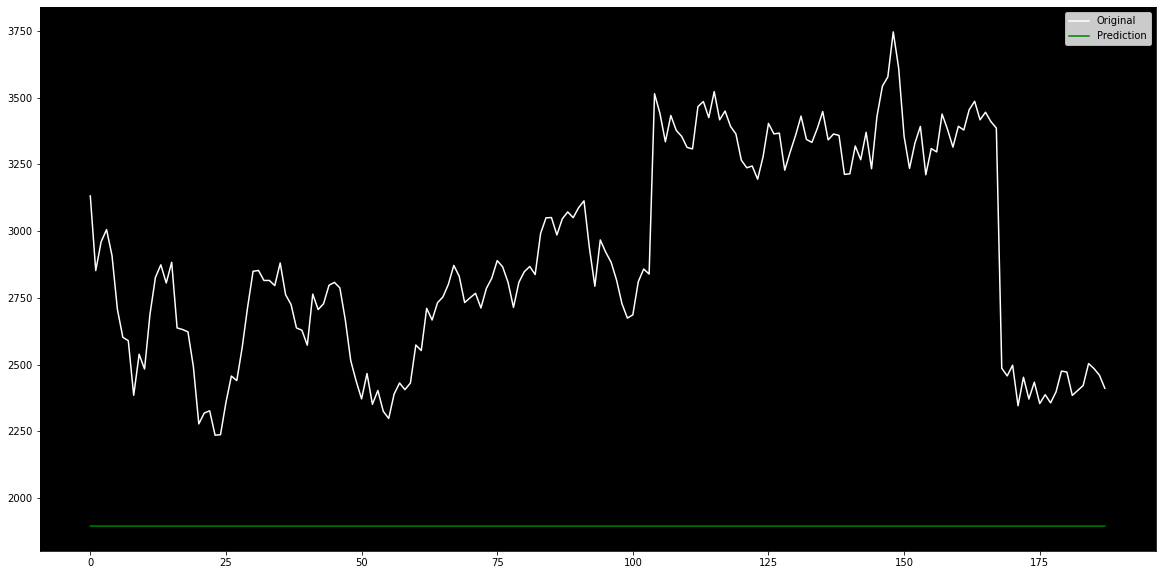

In [20]:
#Closed Prediction
predictions1 = model1.predict(x_test1)
predictions1 = scaler.inverse_transform(predictions1)
y_test_scaled1 = scaler.inverse_transform(y_test1.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(20,10))
ax.set_facecolor('#000000')
ax.plot(y_test_scaled1, color='white', label='Original')
plt.plot(predictions1, color='green', label='Prediction')
plt.legend()